# A simple analysis of inflation and bnp in a closed economy

Imports and set magics:

In [3]:
import numpy as np
from scipy import optimize
import sympy as sm
import ipywidgets as wg
import matplotlib.pyplot as plt
from IPython.display import display

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject as mp


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

We consider  the following model of inflation and GNP.

<!---
it looks like a mess because I don't know how to indent, "&nbsp;" is equal to one space.
-->

|||
|:---|---|
|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;AD.   |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$y_t = \bar{y} - \alpha (\pi_t - \pi^*)$   |
|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;AS.   |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\pi_t = \pi_{t-1} + \gamma (y_t - \bar{y})$   |

Where $\pi_{t}$ is inflation at period t, $y_t$ is GNP at period t, and $\gamma$ and alfa are parameters larger than 0. 

$\pi^*$ is the central banks inflation goal

$\bar{y}$ and $\bar{\pi}$ are the natural levels of output and inflation, meaning the levels if every resource in the economy is used effeciently. 

# Steady state

In [4]:
#using sympy to find steady state

# Defining the symbols
yt, ybar, pit, pistar, pitm1, yhat_t, yhat_t1, alpha, pihat_t, pihat_t1, gamma = sm.symbols('y_t ybar pi_t pi^* pi_t-1 yhat_t yhat_t1 alpha pihat_t pihat_t1 gamma')

In [5]:
# Defining our equations
AD_yt = sm.Eq(yt, ybar - alpha*(pit-pistar))
AS_pit = sm.Eq(pit, pitm1+gamma*(yt-ybar))
display("AD_yt = ", AD_yt, "AS_pit = ", AS_pit)

# the steady state for pi is found by inserting AD into AS
ss1 = sm.Eq(pit, pitm1-gamma*alpha*(pit-pistar))
#solving for pi_t
sspi1 = sm.solve(ss1, pit) # solving for pi_t
sspi = sm.Eq(pit, (alpha*gamma*pistar + pitm1)/(alpha*gamma + 1)) # converting result to equation
display('steady state for pi is: ', sspi) # displaying result

# the steady state for y is found by inserting AS into AD
ss2 = sm.Eq(yt, ybar - alpha*(pitm1+gamma*(yt-ybar)-pistar))
ssy1 = sm.solve(ss2, yt) # solving for y_t
ssy = sm.Eq(yt,(alpha*gamma*ybar + alpha*pistar - alpha*pit-1 + ybar)/(alpha*gamma + 1)) # converting result to equation
display('steady state for y is: ', ssy) # displaying result




'AD_yt = '

Eq(y_t, -alpha*(-pi^* + pi_t) + ybar)

'AS_pit = '

Eq(pi_t, gamma*(y_t - ybar) + pi_t-1)

'steady state for pi is: '

Eq(pi_t, (alpha*gamma*pi^* + pi_t-1)/(alpha*gamma + 1))

'steady state for y is: '

Eq(y_t, (alpha*gamma*ybar + alpha*pi^* - alpha*pi_t + ybar - 1)/(alpha*gamma + 1))

# Graphing the equations

In [35]:
# Defining AD and AS as graphs
def AD_graph(a):
    yt = np.linspace(0,100)
    ybar = 10
    pistar = 0.02
    pit = (a*pistar - yt + ybar)/a
    
    # Making the graph
    plt.plot(yt, pit ,'r-')
    plt.ylabel('pi') 
    plt.xlabel('yt')
    plt.ylim([0,10])
    plt.xlim([5,15])
    
def AS_graph(g):
    yt = np.linspace(0,100)
    ybar = 10
    pitm1 = 0.01
    pit = g*(yt-ybar)+pitm1
    # Making the graph

    plt.plot(yt, pit, 'b-')
    plt.ylabel('pi') 
    plt.xlabel('yt')
    plt.ylim([0,10])
    plt.xlim([5,15])


In [36]:
# Makeing a slider for a and g
a_slider = wg.FloatSlider(value=0.5, min=0, max=1, step = 0.01)
g_slider = wg.FloatSlider(value=0.5, min=0, max=1, step = 0.01)

AD = wg.interact(AD_graph, a = a_slider)
AS = wg.interact(AS_graph, g = g_slider)

interactive(children=(FloatSlider(value=0.5, description='a', max=1.0, step=0.01), Output()), _dom_classes=('w…

interactive(children=(FloatSlider(value=0.5, description='g', max=1.0, step=0.01), Output()), _dom_classes=('w…

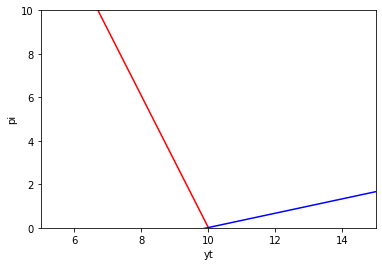

In [37]:
# Graphic solution for alpha = gamma = 1/3
AD_graph(0.33)
AS_graph(0.33)

## Unforseen changes to inflation

Because of unforseen consequenses the inflation in period t-1 is now 1 pct., where as the goal for the inflation is 2 pct.
By using a solver we can see that the optimal level for the inflation in our model is 2 pct. meaning the inflation will settle at 2 pct. in the steady state.

In [9]:
#Defining values used in this exampla.
pi_t1 = 0.01 # the inflation is 1% instead of the 2% inflation goal.
gamma = 0.1
ybar = 10
pistar = 0.02
alpha = 0.33

def AS(y_t):
    return pi_t1 + gamma*(y_t - ybar)
def obj(y_t):
    return alpha * (AS(y_t) - pistar)

In [10]:
#using solver from modelproject to find the optimal pi
optimum = mp.solve_for_ss(pi_t1, gamma, ybar, pistar, alpha)

## Conclusion

In [11]:
yoptimum = optimum.x[0]
print(f'the optimal y is equal to {yoptimum:.2f} which is also equal to the most effecient output')
pioptimum = AS(optimum.x[0])
print(f'the optimal pi is equal to {pioptimum:.2f} which is also equal to the inflation goal')

the optimal y is equal to 10.10 which is also equal to the most effecient output
the optimal pi is equal to 0.02 which is also equal to the inflation goal
